In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import altair as alt
import pandas as pd

In [2]:
ds = pd.read_csv('S1SubActivities_preprocessed.csv', index_col = None) 
ds.start = pd.to_datetime(ds.start, format='%Y-%m-%d %H:%M:%S')
ds.end = pd.to_datetime(ds.end, format='%Y-%m-%d %H:%M:%S')
ds = ds.sort_values('start')
ds.reset_index(drop = True, inplace = True)

In [3]:
ds.head(n=2)

,subActNum,subAct,start,end
0,67,Cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43
1,100,Toilet Flush,2003-03-27 06:44:06,2003-03-27 07:12:41


In [4]:
ds.set_index(ds.start, inplace = True)
ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True) #

In [5]:
ds.head(n=2)

,subActNum,subAct,start,end,DAY,WDWE
start,,,,,,
2003-03-27 06:43:40,67,Cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,3
2003-03-27 06:44:06,100,Toilet Flush,2003-03-27 06:44:06,2003-03-27 07:12:41,3,3


In [6]:
dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
#dayNumKeyWithDAYDict
dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
#dayNumKeyWithWDWEDict

1. Set specified column as index
2. Extract dayofweek from index (ds.index.dayofweek.astype(str)), as this as an attribute
3. Replace '0' with 'mon' and so on
4. Duplic

In [8]:
ds = ds.replace({"DAY": dayNumKeyWithDAYDict})

In [9]:
ds

,subActNum,subAct,start,end,DAY,WDWE
start,,,,,,
2003-03-27 06:43:40,67,Cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,Thu,3
2003-03-27 06:44:06,100,Toilet Flush,2003-03-27 06:44:06,2003-03-27 07:12:41,Thu,3
2003-03-27 06:44:20,101,Light switch,2003-03-27 06:44:20,2003-03-27 07:46:34,Thu,3
2003-03-27 06:44:35,57,Medicine cabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,Thu,3
2003-03-27 06:44:36,58,Medicine cabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,Thu,3
2003-03-27 06:44:49,67,Cabinet,2003-03-27 06:44:49,2003-03-27 06:44:56,Thu,3
2003-03-27 06:45:45,82,Drawer,2003-03-27 06:45:45,2003-03-27 06:45:48,Thu,3
2003-03-27 06:46:12,71,Drawer,2003-03-27 06:46:12,2003-03-27 06:46:20,Thu,3
2003-03-27 06:51:43,80,Cabinet,2003-03-27 06:51:43,2003-03-27 06:51:46,Thu,3


In [45]:
# Pre-req = datetime is the index!
ds.set_index(ds.start, inplace = True)
DAY = ds.index.dayofweek.astype(str)
ds['DAY'] = dayOfAct
ds['DAY'].replace(['0','1','2','3','4','5','6'],
                  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], 
                  inplace = True)
ds['WDWE'] = ds['DAY']
ds['WDWE'].replace(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
                   ['WD','WD','WD','WD','WD','WE','WE'],
                              inplace = True)
ds.reset_index(drop = True, inplace = True)

In [46]:
ds.head(n=5)

,subActNum,subAct,start,end,DAY,WDWE
0,67,Cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,Thu,WD
1,100,Toilet Flush,2003-03-27 06:44:06,2003-03-27 07:12:41,Thu,WD
2,101,Light switch,2003-03-27 06:44:20,2003-03-27 07:46:34,Thu,WD
3,57,Medicine cabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,Thu,WD
4,58,Medicine cabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,Thu,WD


* Title with SubActNum and SubAct
* Start Date as Thu 03 March
* Weekends orange
* Weekdays blue
* 24till2
* 3till5
* 6till8
* 9till11
* 12till14
* 15till17
* 18till20
* 21till23

In [4]:
# Unique subActNum list
unique_list = []
for x in ds.subActNum:                     # Traverse for all elements 
    if x not in unique_list:            # Check if exists in unique_list or not 
        unique_list.append(x)     

In [10]:
cars = pd.read_csv('auto-mpg.csv',index_col='car name')

In [12]:
cars.head(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


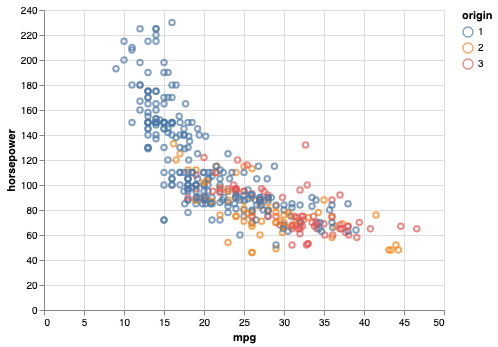

In [14]:

alt.Chart(cars).mark_point().encode(
    x='mpg:Q',
    y='horsepower:Q',
    color='origin:N'
)

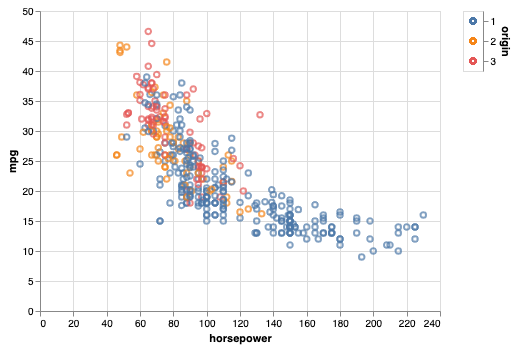

In [15]:
selection = alt.selection_multi(fields=['origin'])
color = alt.condition(selection,
                      alt.Color('origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='horsepower:Q',
    y='mpg:Q',
    color=color,
    tooltip='car name:N'
)

legend = alt.Chart(cars).mark_point().encode(
    y=alt.Y('origin:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

scatter | legend

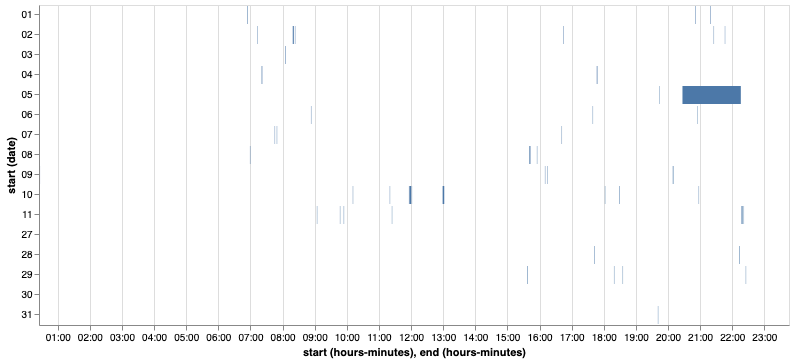

In [16]:
# https://altair-viz.github.io/user_guide/interactions.html
dsCheck = ds[ds['subAct']=='Sink faucet - hot']

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()



selection = alt.selection_multi(fields=['origin'])
color = alt.condition(selection,
                      alt.Color('origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='horsepower:Q',
    y='mpg:Q',
    color=color,
    tooltip='car name:N'
)

legend = alt.Chart(cars).mark_point().encode(
    y=alt.Y('origin:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

scatter | legend

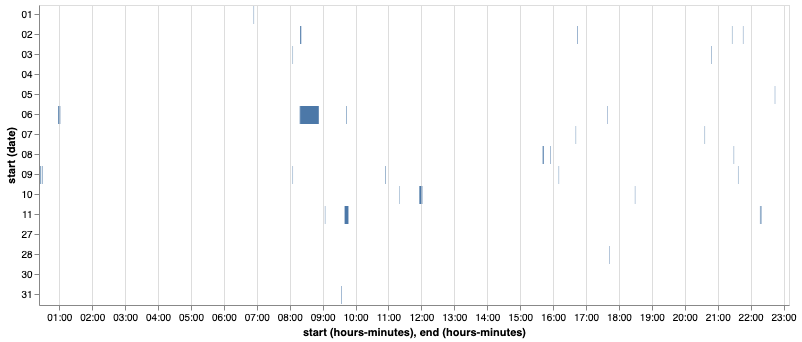

In [90]:
dsCheck = ds[ds['subAct']=='Sink faucet - cold']

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

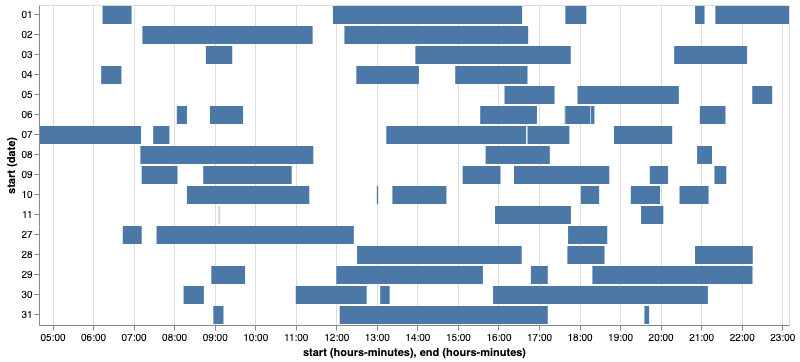

In [10]:
dsCheck = ds[ds['subAct']=='Toilet Flush']

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

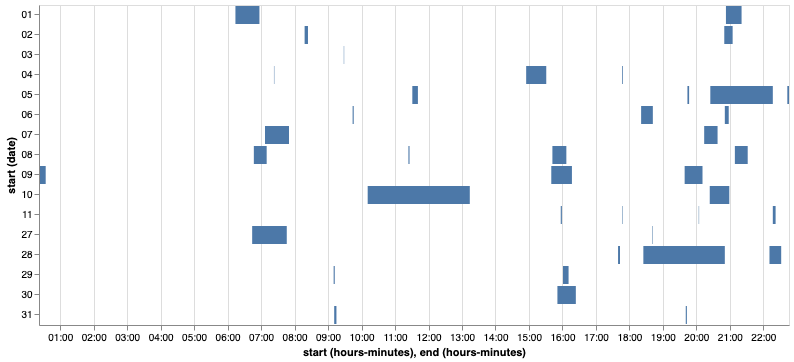

In [9]:
dsCheck = ds[ds['subActNum']==101]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

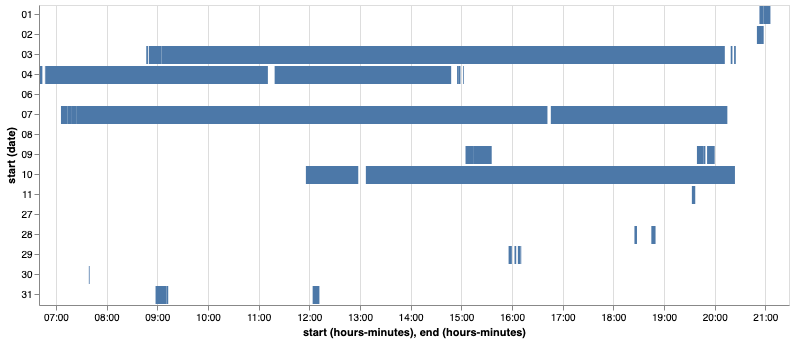

In [95]:
dsCheck = ds[ds['subActNum']==93]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

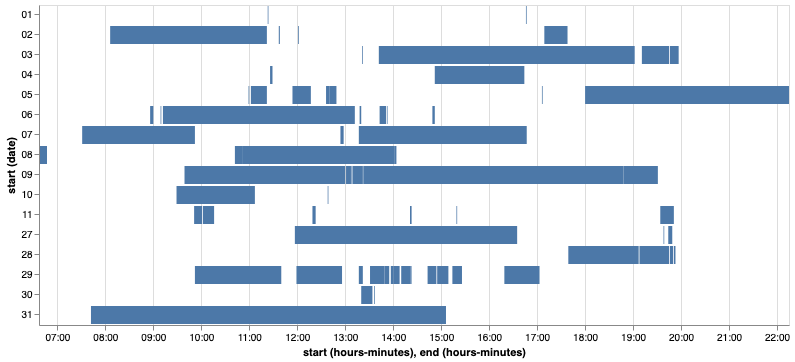

In [109]:
dsCheck = ds[ds['subActNum']==137]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

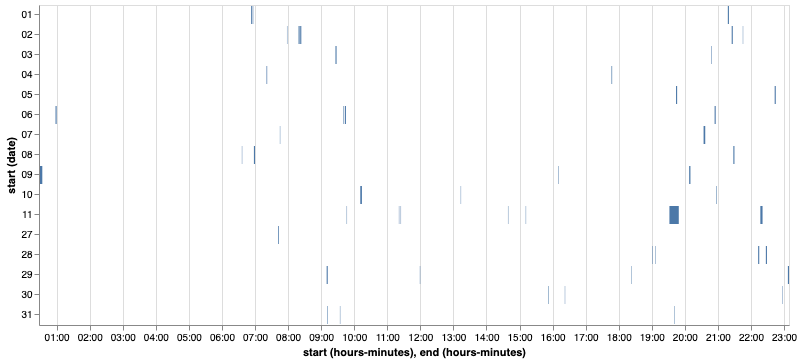

In [99]:
dsCheck = ds[ds['subActNum']==58]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

In [108]:
#https://stackoverflow.com/questions/50164001/multiple-column-row-facet-wrap-in-altair?rq=1

---

In [ ]:
charts = []
for value in unique_list:
    dsValue = ds[ds['subActNum'] == value]
    
    df = pd.DataFrame({ 
    'start': dsValue.start, 
    'end': dsValue.end,})

    alt.Chart(df.reset_index()).mark_bar().encode(
        y='date(start):O',
        x='hoursminutes(start)',
        x2='hoursminutes(end)',
        detail='index') 
    
    for i in range(len(unique_list)):
        charts.append(alt.Chart(df).mark_point())
    alt.vconcat(*charts)
